In [14]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="ticks")
sns.set_style("whitegrid")
pd.options.display.max_rows = 999

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q streamlit

     |████████████████████████████████| 8.2MB 19.6MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 4.2MB 29.3MB/s 
     |████████████████████████████████| 112kB 47.6MB/s 
     |████████████████████████████████| 163kB 46.2MB/s 
     |████████████████████████████████| 122kB 53.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [3]:
def plot():
  plot=sns.boxplot(x="age", hue="sex", data=df)
  return plot

In [4]:
import requests
path="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtrDcEEvdSPDiKyg4FiTsxIgyMb-klnNGP2Q&usqp=CAU"
requests.get(path, stream=True).raw

In [5]:
cardio_history_alcoolisme = df.iloc[:, -2:].fillna(0) # NaN is 0 for the binary value?
medical_history = pd.concat([df.loc[:, "depression_anxiety_history":"COPD_asthma" ], cardio_history_alcoolisme], axis=1)
medical_history.sum().sort_values().plot.barh()

NameError: ignored

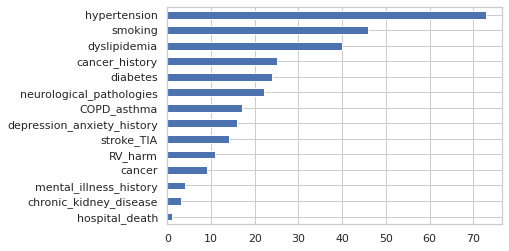

In [ ]:
fig=medical_history.sum().sort_values().plot.barh()
fig

In [ ]:
medical_history.sum()

depression_anxiety_history    16.0
mental_illness_history         4.0
neurological_pathologies      22.0
hypertension                  73.0
dyslipidemia                  40.0
smoking                       46.0
diabetes                      24.0
chronic_kidney_disease         3.0
stroke_TIA                    14.0
cancer_history                25.0
cancer                         9.0
COPD_asthma                   17.0
hospital_death                 1.0
RV_harm                       11.0
dtype: float64

In [ ]:
medical_history

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

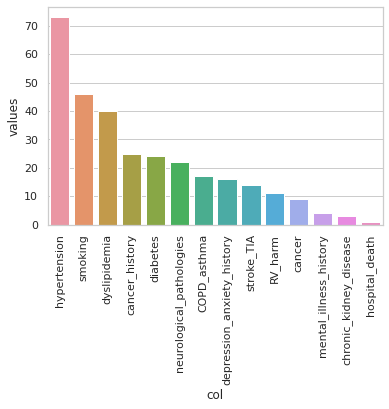

In [ ]:
dff = medical_history.sum().sort_values().reset_index().rename(columns={"index": "col", 0:"values"})
dff.sort_values("values", inplace=True, ascending=False)

plt.xticks(rotation=90)

In [7]:
  cardio_history_alcoolisme = df.iloc[:, -2:].fillna(0)
  medical_history = pd.concat([df.loc[:, "depression_anxiety_history":"COPD_asthma"], cardio_history_alcoolisme], axis=1)
  dff = medical_history.sum().sort_values().reset_index().rename(columns={"index": "col", 0:"values"})
  dff.sort_values("values", inplace=True, ascending=False)
  sns.barplot(x="col", y="values", data=dff, order=dff["col"])

NameError: ignored

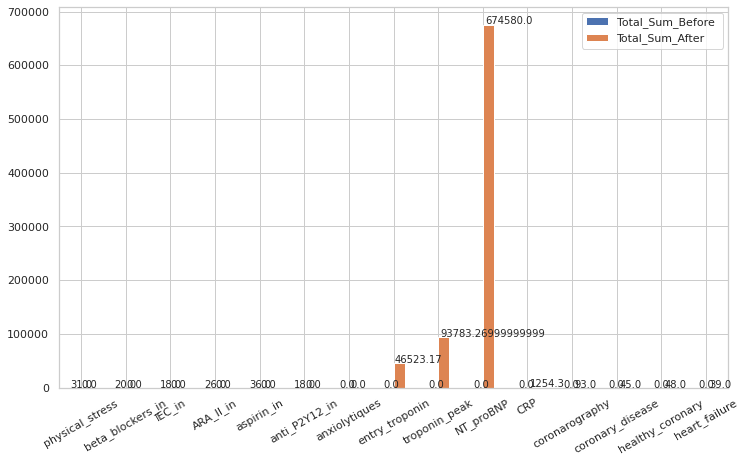

In [ ]:
treatment_before = df.iloc[: , 25: 33].replace(np.nan, 0) # Exclude ttt entrée = ttt antérieur
treatment_after = df.iloc[:,  56:65].replace(np.nan, 0)
treatment_before["anxiolytiques"] =0.0 # Add anxiolytiques for treatment_before
sum_treatment = pd.concat([treatment_before.sum(axis=0), treatment_after.sum(axis=0)], axis=1)
sum_treatment.rename(columns = {0:"Total_Sum_Before ", 1:"Total_Sum_After"}, inplace=True)
ax = sum_treatment.plot.bar(figsize=(12, 7), rot=30)
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [15]:
%%writefile simple_streamlit_app.py
from matplotlib.backends.backend_agg import RendererAgg
_lock = RendererAgg.lock
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
sns.set_theme(style="ticks")
sns.set_style("whitegrid")
 
path_dk = "/content/drive/MyDrive/Takotsubo_Prognosis/Data/modified_data.csv"
df = pd.read_csv(path_dk)
 

st.set_page_config(layout="wide")

with st.beta_container():
  st.title("**TAKOTSUBO CARDIOMYOPATHY: PREDICTIVE MODEL**")
  st.write("**Takotsubo cardiomyopathy (TTC) or « broken heart » syndrome** is a condition mostly triggered by \
            physical or emotional stress. It happens when the left ventricule, which is the heart’s largest cavity,\
            responsible for pumping the blood to the whole body through the aorta, swells and changes shape, \
            impairing the heart function by reducing the blood flow coming out of the heart.  \
            The symptoms are similar to a classic myocardium infarction, but intrinsically different,\
            because in the latter, it’s most of the time because of a stenosis of the coronary arteries \
            (the one feeding the myocardium) provocking ischemia and necrosis of the heart muscle, \
            and impairing its pump function. In TTC, there’s a temporary deformation of the myocardium, \
            leading to the same consequences than an acutal heart infarction.")
  st.image("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtrDcEEvdSPDiKyg4FiTsxIgyMb-klnNGP2Q&usqp=CAU")

with st.beta_container():
  st.subheader("Take a look at our data")
  st.write(df.head())

with st.beta_container():
  st.header("Patient Description")
################################
st.write("")
row1, row2, row3 = st.beta_columns(3)

with row1, _lock:
  st.write("We can observe many patients are at age of around 60 to 80")
  def age_box():
    fig,ax = plt.subplots()
    with st.echo(): 
      sns.boxplot(x="age", hue="sex", data=df)
      plt.title("Patient's age", fontsize=14, fontname="Times New Roman Bold", fontweight="bold")
    return fig

  plot=age_box()
  st.pyplot(plot, clear_figure=True)

with row2, _lock:
  st.write("We can observe BMI value is around 20 to 30")
  def BMI_hist():
    fig2,ax = plt.subplots()
    with st.echo(): 
      sns.histplot(x="BMI",data=df, kde=True)
      plt.title("Patient's BMI", fontsize=14, fontname="Times New Roman Bold", fontweight="bold")
    return fig2

  plot=BMI_hist()
  st.pyplot(plot, clear_figure=True)

with row3, _lock:
  st.write("We can observe BMI value is around 20 to 30")
  def BMI_hist():
    fig,ax = plt.subplots()
    with st.echo(): 
      sns.scatterplot(x="age", y="BMI",data=df[df.BMI.notnull()],  s=50, edgecolor="black", linewidth=0.5,legend=False)    
      plt.title("age vs BMI", fontsize=14, fontname="Times New Roman Bold", fontweight="bold")
    return fig
  st.pyplot(BMI_hist(), clear_figure=True)
############################################

with st.beta_container():
  st.header("Medical History")
st.write("")
row1, row2 = st.beta_columns(2)
# with row1, _lock:
#   cardio_history_alcoolisme = df.iloc[:, -2:].fillna(0)
#   medical_history = pd.concat([df.loc[:, "depression_anxiety_history":"COPD_asthma" ], cardio_history_alcoolisme], axis=1)
#   fig=medical_history.sum().sort_values().plot.barh()
#   st.pyplot(fig, clear_figure=True)

with row2, _lock:
  cardio_history_alcoolisme = df.iloc[:, -2:].fillna(0)
  medical_history = pd.concat([df.loc[:, "depression_anxiety_history":"COPD_asthma"], cardio_history_alcoolisme], axis=1)
  dff = medical_history.sum().sort_values().reset_index().rename(columns={"index": "col", 0:"values"})
  dff.sort_values("values", inplace=True, ascending=False)
  def medical_hist_sum():
    fig,ax = plt.subplots()
    with st.echo():
      sns.barplot(x="col", y="values", data=dff, order=dff["col"])
      plt.xticks(rotation=90)
    return fig
  st.pyplot(medical_hist_sum(), clear_figure=True)



##############################
with st.beta_container():
  st.header("Treatment")
################################
st.write("")
row1, row2 = st.beta_columns(2)

#df.columns.get_loc("ttt entrée = ttt antérieur") # Get the integer index of the specified column
treatment_before = df.iloc[: , 25: 33].replace(np.nan, 0) # Exclude ttt entrée = ttt antérieur
treatment_after = df.iloc[:,  56:65].replace(np.nan, 0)
treatment_before["anxiolytiques"] =0.0 # Add anxiolytiques for treatment_before
sum_treatment = pd.concat([treatment_before.sum(axis=0), treatment_after.sum(axis=0)], axis=1)
sum_treatment.rename(columns = {0:"Total_Sum_Before ", 1:"Total_Sum_After"}, inplace=True)

with row1, _lock:
  fig, ax = plt.subplots()
  st.write("We can observe many patients are treated ...")
  def sum_treatment():
    ax = sum_treatment.plot.bar(figsize=(12, 7), rot=30)
    for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    return fig
  st.pyplot(sum_treatment(), clear_figure=True)



# avriable = st.selectbox('box', df.columns)
# st.area_chart(df[variable])

# selected_col2=st.multiselect('Choose variables', df.columns)
# st.bar_chart(df[selected_col2])

# st.dataframe(df.describe().T)
# st.dataframe(df.style.highlight_null())

# st.sidebar.markdown("## Select Data Time and Detector")

# select_event = st.sidebar.selectbox("Which variables you want to see?",
#                                     list(df.columns))

# st.sidebar.markdown('## Set Plot Parameters')
# dtboth = st.sidebar.slider('Time Range (seconds)', 0.1, 18.0, 1.0)  # min, max, default
# dt = dtboth / 2.0
# st.bar_chart(df[select_event])

Overwriting simple_streamlit_app.py


In [16]:
!wget https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py

--2021-04-28 05:18:24--  https://raw.githubusercontent.com/dataprofessor/code/master/streamlit/iris-ml-app.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-04-28 05:18:24 ERROR 404: Not Found.



In [17]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-04-28 05:18:25--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.212.138.198, 3.231.70.9, 52.0.242.214, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.212.138.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  38.1MB/s    in 0.3s    

2021-04-28 05:18:26 (38.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13828408/13828408]



In [18]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [25]:
get_ipython().system_raw('./ngrok http 8501 &')

In [26]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://87eda216c72e.ngrok.io


In [27]:
!streamlit run /content/simple_streamlit_app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.174.210:8501

2021-04-28 05:22:07.952 findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.
2021-04-28 05:22:08.441 NumExpr defaulting to 2 threads.
  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py